In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer   
from sklearn.metrics import roc_auc_score  
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

Dataset: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
        
Features and information:

1. Date: The date of observation
2. Location: The common name of the location of the weather station
3. MinTemp: The minimum temperature in degrees celsius
4. MaxTemp: The maximum temperature in degrees celsius 
5. Rainfall: The amount of rainfall recorded for the day in mm
6. Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine: The number of hours of bright sunshine in the day.
8. WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am: Direction of the wind at 9am
11. WindDir3pm: Direction of the wind at 3pm
12. WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm: Direction of the wind at 3pm
14. Humidity9am: Humidity (percent) at 9am:
15. Humidity3pm: Humidity (percent) at 3pm:
16. Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many
19. Cloud3pm: Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths. It records how many
20. Temp9am: Temperature (degrees C) at 9am
21. Temp3pm: Temperature (degrees C) at 3pm
22. RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RainTomorrow: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

# Data preparation and data cleaning

In [92]:
df = pd.read_csv("weatherAUS.csv",sep=",")
df.shape

(145460, 23)

**The data contains 145460 entries and 23 features**

In [93]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [94]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [95]:
df.RainToday = (df.RainToday == "Yes").astype(int) #converts yes to 1 and no to 0
df.RainTomorrow = (df.RainTomorrow == "Yes").astype(int) #converts yes to 1 and no to 0

In [96]:
df.describe().round()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,143975.0,144199.0,142199.0,82670.0,75625.0,135197.0,143693.0,142398.0,142806.0,140953.0,130395.0,130432.0,89572.0,86102.0,143693.0,141851.0,145460.0,145460.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,1018.0,1015.0,4.0,5.0,17.0,22.0,0.0,0.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,6.0,7.0,0.0,0.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0,0.0,0.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,37.0,1013.0,1010.0,1.0,2.0,12.0,17.0,0.0,0.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0,0.0,0.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,66.0,1022.0,1020.0,7.0,7.0,22.0,26.0,0.0,0.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0,1.0,1.0


In [97]:
# Date could be changed into day, month and year, which would boost the prediction

months_dic = {
    1:'january',2:'feabruary',3:'march',4:'april',5:'may',6:'june',
    7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'
}

def extract_date(x):
    years, months, days = [],[],[]
    for d in x.Date.values:
        year,month,day = d.split("-")
        years.append(int(year))
        months.append(int(month))
        days.append(int(day))
    return years, months, days

years, months, days = extract_date(df)
df["year"] = years
df["month"] = months
df["day"] = days
df.month = df.month.map(months_dic)
del df["Date"]

In [98]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0,0,2008,december,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0,0,2008,december,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0,0,2008,december,3


## Split Dataset into Train/Val/Test (60%/20%/20%)

In [99]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
print (len(df_train),len(df_test),len(df_val))

df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.RainTomorrow.values
y_test = df_test.RainTomorrow.values
y_val = df_val.RainTomorrow.values

del df_train['RainTomorrow']
del df_test['RainTomorrow']
del df_val['RainTomorrow']


87276 29092 29092


In [100]:
df_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,NorfolkIsland,11.2,20.6,0.0,NaN,NaN,NE,37.0,NNE,NNE,...,1018.8,1015.1,2.0,NaN,17.8,18.9,0,2016,october,23
1,Albury,3.6,19.0,0.0,NaN,NaN,SSW,28.0,SSE,WSW,...,1021.3,1018.1,NaN,NaN,10.8,18.2,0,2016,october,24
2,Perth,19.8,34.1,0.0,12.0,12.2,SSW,44.0,NW,SW,...,997.2,998.0,1.0,1.0,31.7,26.6,0,2011,january,13
3,Watsonia,14.0,15.0,13.8,7.6,0.1,SW,31.0,WSW,NNW,...,1015.0,1016.5,8.0,7.0,14.2,14.3,1,2016,april,6
4,MountGinini,4.6,14.8,0.0,NaN,NaN,WNW,46.0,WNW,WNW,...,NaN,NaN,NaN,NaN,9.0,13.0,0,2013,november,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87271,Newcastle,22.4,29.9,0.0,NaN,NaN,NaN,NaN,NE,NE,...,NaN,NaN,2.0,4.0,25.6,28.5,0,2011,january,13
87272,Walpole,9.8,14.7,9.2,NaN,NaN,SSW,46.0,WSW,SSW,...,1023.5,1025.4,NaN,NaN,12.5,13.0,1,2015,september,14
87273,Walpole,12.5,23.4,0.0,NaN,NaN,NW,50.0,NNE,NNW,...,1011.8,1004.6,NaN,NaN,15.4,21.6,0,2017,may,14
87274,Wollongong,12.8,18.0,0.0,NaN,NaN,S,37.0,SW,S,...,1026.9,1024.2,NaN,NaN,16.1,17.7,0,2017,may,9


# EDA and feature importance analysis

In [101]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
year               int64
month             object
day                int64
dtype: object

In [102]:
def get_type(df):
    categorical = [col for col in df.columns if df[col].dtype == 'O'] #0 = Object
    numerical = [col for col in df.columns if df[col].dtype != 'O']
    
    return categorical, numerical

categorical, numerical = get_type(df_full_train)
numerical.remove("RainTomorrow")

print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'month']
Numerical features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'year', 'day']


In [103]:
df_full_train[categorical].isnull().sum(axis = 0)

Location          0
WindGustDir    8253
WindDir9am     8471
WindDir3pm     3366
month             0
dtype: int64

In [104]:
df_full_train.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,MountGinini,-2.7,4.3,0.0,NaN,NaN,WSW,41.0,WSW,WSW,...,NaN,NaN,NaN,-1.3,3.9,0,0,2015,august,29
1,SalmonGums,0.2,18.7,1.6,NaN,NaN,NE,37.0,NE,ENE,...,NaN,NaN,NaN,11.7,18.1,1,0,2015,may,13
2,Walpole,7.0,13.8,0.2,NaN,NaN,SSW,61.0,NW,SSW,...,1012.8,NaN,NaN,12.2,9.9,0,1,2015,august,31
3,Perth,9.2,23.4,0.0,6.0,11.6,WNW,24.0,W,W,...,1016.1,2.0,1.0,19.4,22.2,0,0,2012,october,18
4,Perth,13.8,23.6,1.0,5.0,8.9,SW,33.0,SSW,SW,...,1014.0,7.0,4.0,19.6,22.0,0,0,2014,november,22


In [105]:
df_full_train[categorical].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
month          12
dtype: int64

In [106]:
df_full_train[numerical].nunique()

MinTemp          385
MaxTemp          501
Rainfall         643
Evaporation      337
Sunshine         144
WindGustSpeed     65
WindSpeed9am      42
WindSpeed3pm      43
Humidity9am      101
Humidity3pm      101
Pressure9am      536
Pressure3pm      536
Cloud9am          10
Cloud3pm          10
Temp9am          436
Temp3pm          496
RainToday          2
year              11
day               31
dtype: int64

In [107]:
df_full_train[categorical].isnull().sum(axis = 0)

Location          0
WindGustDir    8253
WindDir9am     8471
WindDir3pm     3366
month             0
dtype: int64

**We have NaNs in the direction of the wind. I will populate the NaNs depending on mode for each direction**

In [125]:
for df1 in [df_full_train, df_train, df_val, df_test]:
    df1['WindGustDir'].fillna(df1['WindDir9am'], inplace=True)
    df1['WindDir3pm'].fillna(df1['WindDir9am'], inplace=True)
    
    df1['WindGustDir'].fillna(df1['WindDir3pm'], inplace=True)
    df1['WindDir9am'].fillna(df1['WindDir3pm'], inplace=True)
    
    df1['WindDir3pm'].fillna(df1['WindGustDir'], inplace=True)
    df1['WindDir9am'].fillna(df1['WindGustDir'], inplace=True)
    
#df_full_train[categorical].isnull().sum()

#for df1 in [df_full_train, df_train, df_val, df_test]:
#    for col in ['WindGustDir','WindDir9am','WindDir3pm']:
#        df1[col].fillna(df_full_train[col].mode()[0], inplace=True)
for df1 in [df_full_train, df_train, df_val, df_test]:
    df1["WindGustDir"].fillna(df_full_train["WindGustDir"].mode()[0], inplace=True)
    df1["WindDir9am"].fillna(df_full_train["WindGustDir"].mode()[0], inplace=True)
    df1["WindDir3pm"].fillna(df_full_train["WindGustDir"].mode()[0], inplace=True)

**There are 1465 entries with NaN in all 3 features for wind direction. I will add the mode.**

In [126]:
#for df1 in [df_full_train, df_train, df_val, df_test]:
#    df1.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm'], inplace=True)

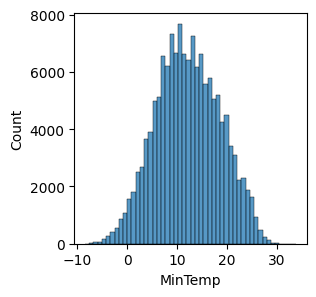

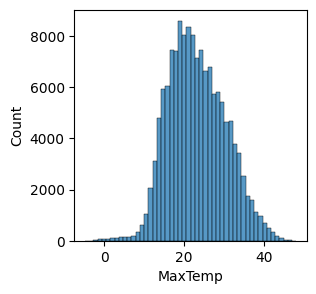

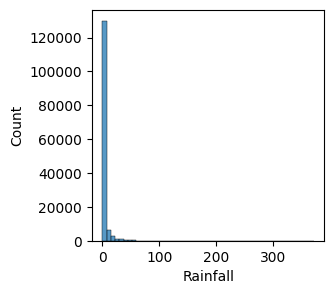

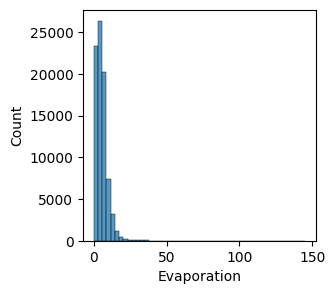

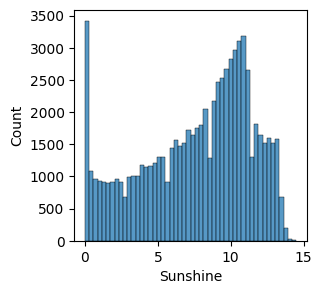

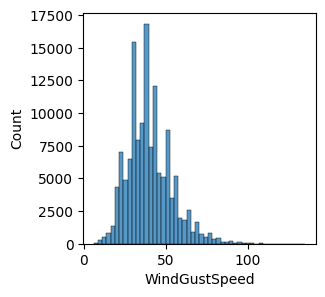

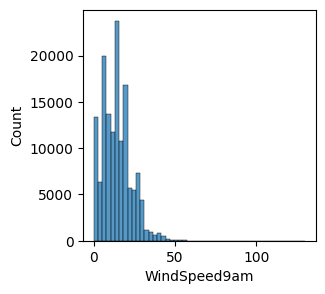

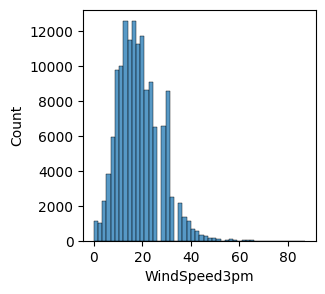

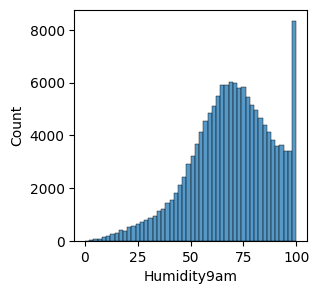

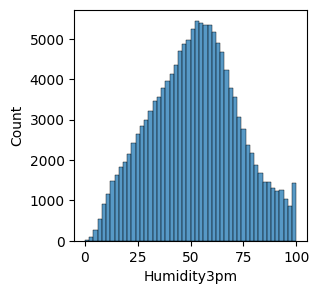

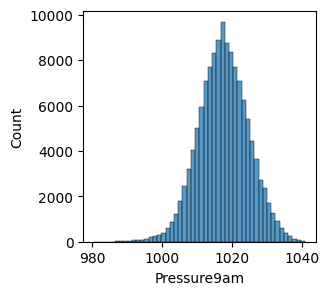

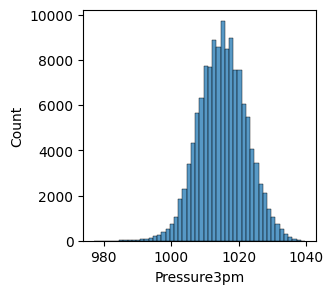

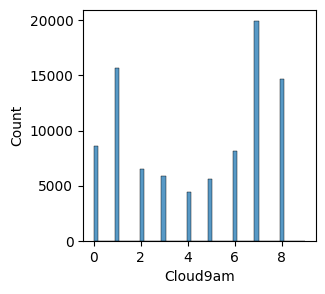

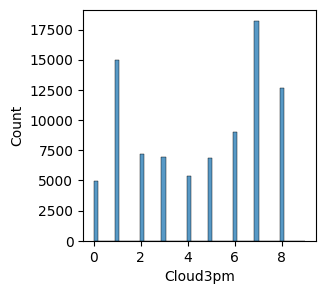

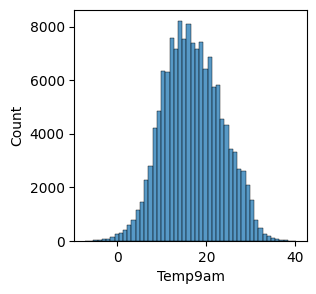

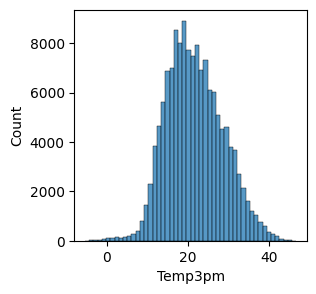

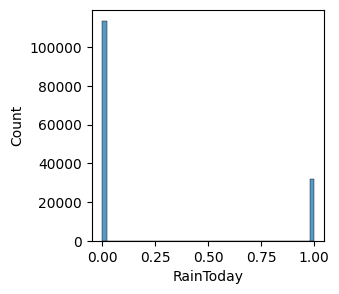

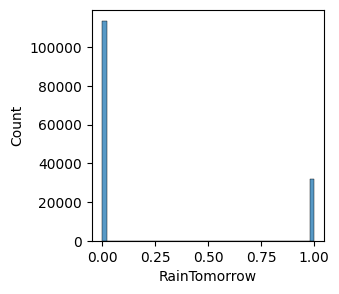

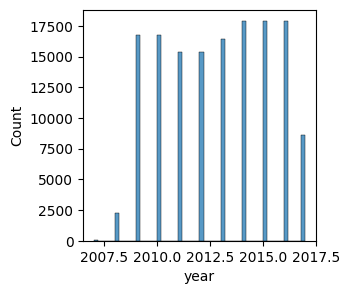

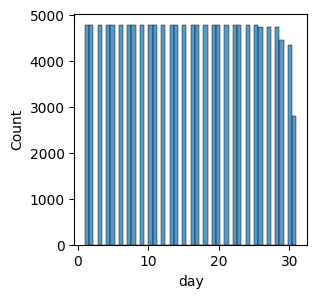

In [127]:
for i,col in enumerate (df_full_train.describe().columns):
    plt.figure(i,figsize=(3,3))
    sns.histplot(df[col],bins=50)

<AxesSubplot: >

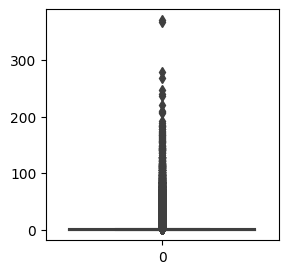

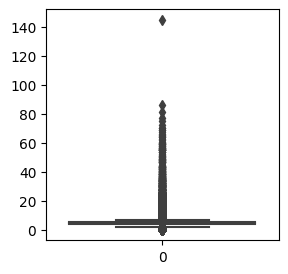

In [128]:
# Looks like Rainfall and Evaporation have some outliers
plt.figure(figsize=(3,3))
sns.boxplot(df_full_train["Rainfall"])
plt.figure(figsize=(3,3))
sns.boxplot(df_full_train["Evaporation"])

In [129]:
df_full_train[numerical].isnull().sum(axis = 0)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
year             0
day              0
dtype: int64

In [130]:
# for the rest of the values, fill nans with median values since we have some outliers.
for df1 in [df_full_train, df_train, df_val, df_test]:
    for col in numerical:
        median_value = df_full_train[col].median() #use median of the full train
        df1[col].fillna(median_value, inplace=True) 
    

In [131]:
df_full_train.isnull().sum(axis = 0)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [132]:
df_full_train.RainTomorrow.value_counts(normalize=True)

0    0.7803
1    0.2197
Name: RainTomorrow, dtype: float64

## Feature importance

In [133]:
def mutual_info_rain_tomorrow_score(series):
    return mutual_info_score(series, df_full_train.RainTomorrow)

mi = df_full_train[categorical+numerical].apply(mutual_info_rain_tomorrow_score)
mi = mi.sort_values(ascending=False)
mi


Humidity3pm      0.108073
Rainfall         0.056187
Sunshine         0.055162
Cloud3pm         0.050349
RainToday        0.042060
Humidity9am      0.037405
Cloud9am         0.035263
Pressure9am      0.030806
Pressure3pm      0.026763
WindGustSpeed    0.025093
Temp3pm          0.022009
MaxTemp          0.016459
Location         0.012853
Evaporation      0.007360
MinTemp          0.007280
WindDir9am       0.007107
WindGustDir      0.005659
WindSpeed3pm     0.005294
WindDir3pm       0.004583
WindSpeed9am     0.003943
Temp9am          0.003907
month            0.001574
year             0.000610
day              0.000329
dtype: float64

# Model selection process and parameter tuning

We have learned the next algorithms for classification:
1. LogisticRegression()
2. DecisionTreeClassifier()
3. RandomForestClassifier()
4. XGBoost()

In [134]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [146]:
# 1 Logistic Regression

scores = []
for C in [0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 1000]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000,random_state=1 )
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred).round(3)
   
    print ("C: {}, AUC: {}".format(C, auc))


C: 0.001, AUC: 0.862
C: 0.01, AUC: 0.866
C: 0.1, AUC: 0.867
C: 1, AUC: 0.867
C: 10, AUC: 0.867
C: 100, AUC: 0.868
C: 200, AUC: 0.867
C: 500, AUC: 0.867
C: 1000, AUC: 0.865


BEST: C: 100, AUC: 0.868

In [147]:
# 2 Decission Tree

from sklearn.tree import DecisionTreeClassifier

scores = []
for d in [1,2,3,4,5,6,10, 15, 20, 25, 50,  None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf = s, random_state=1)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,s,auc))
        #print ('%4s %s -> %.3f' % (d,s, auc))


In [148]:
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
print(df_scores.sort_values(by="auc",ascending=False))


     max_depth  min_samples_leaf       auc
106        NaN               200  0.850474
97        50.0               200  0.850474
88        25.0               200  0.850474
79        20.0               200  0.850474
70        15.0               200  0.850256
..         ...               ...       ...
5          1.0                20  0.683510
7          1.0               200  0.683510
8          1.0               500  0.683510
0          1.0                 1  0.683510
81        25.0                 1  0.682847

[108 rows x 3 columns]


We will select: 

max_depth = 20 

min_samples_leaf = 200 

AUC: 0.850474


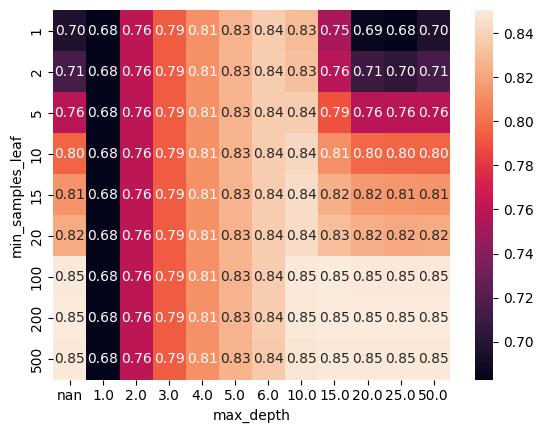

In [150]:
df_scores_pivot= df_scores.pivot(index='min_samples_leaf',columns=["max_depth"],values="auc")
sns.heatmap(df_scores_pivot,annot=True, fmt='.2f')
plt.show()


In [158]:
# 3 Random Forest

from sklearn.ensemble import RandomForestClassifier

scores = []
for d in [5, 10, 15, 20, 25, 30, 35]:
    rf = RandomForestClassifier( max_depth=d, random_state = 1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((d,auc))
    print ('%4s -> %.3f' % (d, auc)) 

   5 -> 0.838
  10 -> 0.859
  15 -> 0.872
  20 -> 0.878
  25 -> 0.881
  30 -> 0.881
  35 -> 0.881


Let's use max depth 25

   1   10 -> 0.852
   1   30 -> 0.873
   1   50 -> 0.877
   1   70 -> 0.879
   1   90 -> 0.880
   1  110 -> 0.881
   1  130 -> 0.882
   1  150 -> 0.882
   1  170 -> 0.882
   1  190 -> 0.882
   3   10 -> 0.859
   3   30 -> 0.874
   3   50 -> 0.877
   3   70 -> 0.879
   3   90 -> 0.879
   3  110 -> 0.880
   3  130 -> 0.880
   3  150 -> 0.880
   3  170 -> 0.880
   3  190 -> 0.880
   5   10 -> 0.863
   5   30 -> 0.873
   5   50 -> 0.876
   5   70 -> 0.877
   5   90 -> 0.878
   5  110 -> 0.878
   5  130 -> 0.878
   5  150 -> 0.878
   5  170 -> 0.878
   5  190 -> 0.879
  10   10 -> 0.867
  10   30 -> 0.873
  10   50 -> 0.874
  10   70 -> 0.875
  10   90 -> 0.875
  10  110 -> 0.875
  10  130 -> 0.875
  10  150 -> 0.875
  10  170 -> 0.875
  10  190 -> 0.875
  15   10 -> 0.865
  15   30 -> 0.871
  15   50 -> 0.872
  15   70 -> 0.872
  15   90 -> 0.872
  15  110 -> 0.872
  15  130 -> 0.872
  15  150 -> 0.872
  15  170 -> 0.873
  15  190 -> 0.873


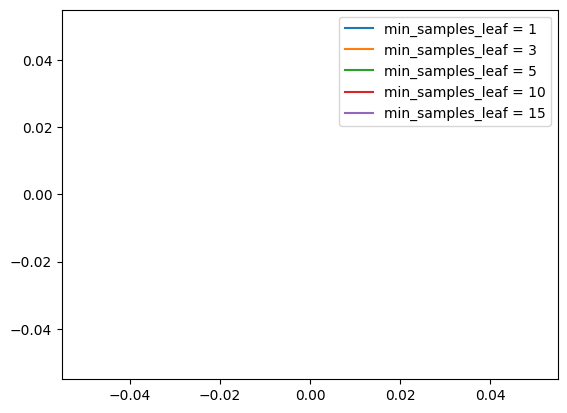

In [163]:
#now tune min leaf
scores = []
max_depth = 25

for m in [1, 3, 5, 10, 15]:
    for n in range(10, 201, 20):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth,min_samples_leaf=m, random_state = 1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((m, n, auc))
        print ('%4s %4s -> %.3f' % (m, n, auc))
df_scores = pd.DataFrame(scores, columns=['min_samples_leaf','n_estimators','auc'])
for m in [1, 3, 5, 10, 15]:
    df_subset = df_scores[df_scores.min_samples_leaf == m]
    plt.plot(df_subset.n_estimators, df_subset.auc,label='min_samples_leaf = %s' % m)
plt.legend()
plt.show()

Best paramenters: 1  130 -> 0.882

In [165]:
# 4 XGBoost

import xgboost as xgb

features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
xgb_params = {
        'eta': 0.3, #how fast it trains
        'max_depth': 6,
        'min_child_weight': 1,  #te same as min_samples_leaf
        'objective': 'binary:logistic', #becasue we have a binary class type
        'nthread': 8,
        'seed': 1,
        'verbosity':1,
        }
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)

print(auc) #for default parameters we get 0.80, pretty good


0.8671738623858599


In [166]:
from io import StringIO 
import sys

watchlist = [(dtrain, 'train'),(dval,'dval')]

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout



def parse_xgb_output(output):
    output = list(output)
    results = []

    #for line in output.strip().split(','):
    for line in output:
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it,train,val))

    columns = ['num_iter','train_auc','val_auc']
    df_results = pd.DataFrame(results,columns=columns)
    return df_results



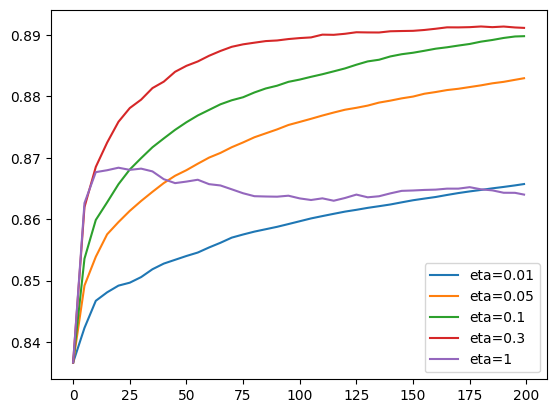

In [167]:
scores = {}
for etas in [0.01, 0.05,0.1,0.3,1]:
    xgb_params = {
            'eta': etas, #how fast it trains
            'max_depth': 6,
            'min_child_weight': 1,  #te same as min_samples_leaf
            'objective': 'binary:logistic', #becasue we have a binary class type
            'eval_metric':'auc',
            'nthread': 8,
            'seed': 1,
            'verbosity':1,
            }
    with Capturing() as output:
        model = xgb.train(xgb_params, dtrain, num_boost_round=200,evals=watchlist,verbose_eval=5)
    key = 'eta=%s' % (xgb_params['eta'])
    scores[key] = parse_xgb_output(output)

for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.show()


eta = 0.3

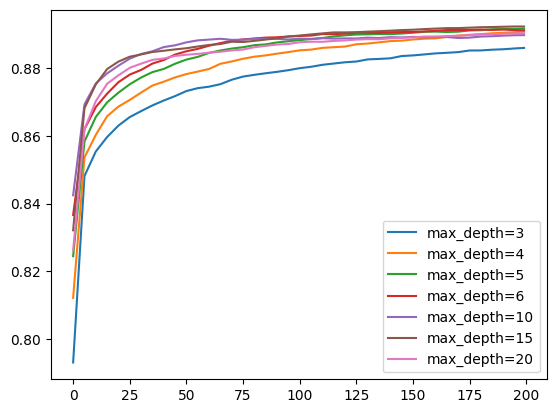

In [171]:
scores = {}
for d in [3, 4, 5, 6, 10, 15, 20]:
    xgb_params = {
            'eta': 0.3, #how fast it trains
            'max_depth': d,
            'min_child_weight': 1,  #te same as min_samples_leaf
            'objective': 'binary:logistic', #becasue we have a binary class type
            'eval_metric':'auc',
            'nthread': 8,
            'seed': 1,
            'verbosity':1,
            }
    with Capturing() as output:
        model = xgb.train(xgb_params, dtrain, num_boost_round=200,evals=watchlist,verbose_eval=5)
    key = 'max_depth=%s' % (xgb_params['max_depth'])
    scores[key] = parse_xgb_output(output)

for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.show()


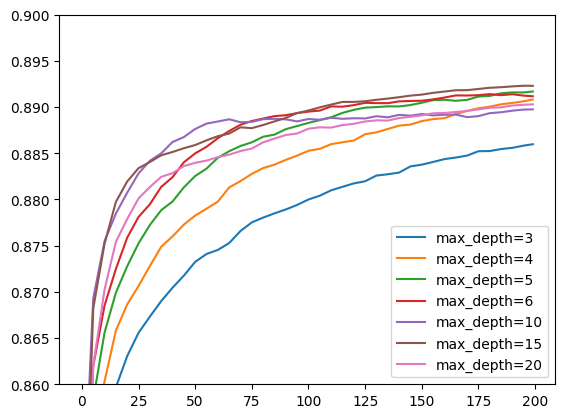

In [172]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()
plt.ylim(0.86,0.90)
plt.show()

max_depth = 15 and eta=0.3

## Train the types of models with the best parameters in the full train dataset

In [179]:

df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.RainTomorrow.values
del df_full_train['RainTomorrow']

dicts_full_train = df_full_train.to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

#for XGboost
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names())
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())





In [181]:
# 1 Logistic Regression

C=100
model = LogisticRegression(solver='liblinear', C=C, max_iter=1000,random_state=1 )
model.fit(X_full_train, y_full_train)

y_pred = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred).round(3)

print ("Logistic Regression AUC: {}".format(auc))

Logistic Regression AUC: 0.865


In [184]:
# 2 Decision Tree
max_depth = 20
min_samples_leaf = 200

dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf = s, random_state=1)
dt.fit(X_full_train, y_full_train)
y_pred = dt.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)

print (" Decision Tree AUC: {}".format(auc))


 Decision Tree AUC: 0.8504713725395219


In [185]:
# 3 Random Forest
max_depth = 25
n_estimators = 130
min_samples_leaf = 1
rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=m, random_state = 1)
rf.fit(X_full_train, y_full_train)
y_pred = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print (" Random Forest AUC: {}".format(auc))

 Random Forest AUC: 0.8737606279424115


In [186]:
# 4 XGBoost
xgb_params = {
        'eta': 0.3, #how fast it trains
        'max_depth': 15,
        'min_child_weight': 1,  #te same as min_samples_leaf
        'objective': 'binary:logistic', #becasue we have a binary class type
        'eval_metric':'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity':1,
        }
model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)
y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
print (" XGBoost AUC: {}".format(auc))


 XGBoost AUC: 0.8909357840732864


In [ ]:
# XGBoost has the best score. We will use it as final mode.

In [187]:
df_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,Penrith,16.6,30.5,16.2,4.8,8.4,NE,31.0,E,NE,...,1017.7,1015.3,5.0,5.0,20.3,29.4,1,2014,october,24
1,Penrith,3.5,21.2,0.0,4.8,8.4,N,74.0,N,NW,...,1017.7,1015.3,5.0,5.0,12.0,15.1,0,2012,august,17
2,Adelaide,9.1,13.8,0.0,1.6,8.4,NE,43.0,NNE,N,...,1017.9,1012.3,5.0,5.0,10.6,13.6,0,2009,june,12
3,Ballarat,6.5,11.2,4.8,4.8,8.4,W,52.0,W,WSW,...,1010.4,1012.6,8.0,8.0,8.5,10.8,1,2013,august,23
4,Cairns,25.1,33.1,0.2,8.6,3.3,SSE,46.0,SSE,ESE,...,1011.5,1008.8,7.0,7.0,29.5,32.0,0,2014,january,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29087,NorahHead,13.0,21.5,0.0,4.8,8.4,NNE,43.0,N,NE,...,1012.1,1006.2,5.0,5.0,18.8,19.3,0,2012,september,23
29088,MountGinini,7.5,14.9,0.0,4.8,8.4,WNW,63.0,NE,NNE,...,1017.7,1015.3,5.0,5.0,11.5,13.2,0,2015,january,13
29089,Sale,11.0,20.7,0.4,1.6,8.5,E,41.0,E,E,...,1028.6,1026.4,7.0,1.0,16.8,19.9,0,2012,april,17
29090,Albany,15.7,22.0,0.0,4.0,8.4,WSW,39.0,WSW,WSW,...,1019.6,1018.8,6.0,5.0,19.8,21.1,0,2016,march,4


In [192]:
df_test.iloc[[1]].to_dict()

{'Location': {1: 'Penrith'},
 'MinTemp': {1: 3.5},
 'MaxTemp': {1: 21.2},
 'Rainfall': {1: 0.0},
 'Evaporation': {1: 4.8},
 'Sunshine': {1: 8.4},
 'WindGustDir': {1: 'N'},
 'WindGustSpeed': {1: 74.0},
 'WindDir9am': {1: 'N'},
 'WindDir3pm': {1: 'NW'},
 'WindSpeed9am': {1: 15.0},
 'WindSpeed3pm': {1: 28.0},
 'Humidity9am': {1: 68.0},
 'Humidity3pm': {1: 43.0},
 'Pressure9am': {1: 1017.7},
 'Pressure3pm': {1: 1015.3},
 'Cloud9am': {1: 5.0},
 'Cloud3pm': {1: 5.0},
 'Temp9am': {1: 12.0},
 'Temp3pm': {1: 15.1},
 'RainToday': {1: 0},
 'year': {1: 2012},
 'month': {1: 'august'},
 'day': {1: 17}}